In [1]:
import pickle
import os
import pandas as pd
import copy
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score
from sklearn.ensemble import RandomForestClassifier
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout, SimpleRNN, Bidirectional
from sklearn.svm import SVC
import tensorflow as tf
import numpy as np
from numpy import loadtxt
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import StandardScaler
import networkx
import math
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import f1_score
from keras import backend as K

In [2]:
df = pd.read_csv('FakeNewsNet.csv')
print(len(df.keys()))
colunas = list(df.keys())
colunas.remove('id')
colunas.remove('classe')
for k in colunas[:]:
    if(k.find("rede") > -1):
        #colunas.remove(k)
        continue
for k in df.keys():
    if(k.find('texto') > -1):
        #colunas.remove(k)
        continue
features = df[colunas]
target = df["classe"]
features.dropna()
print([k for k in features.keys() if(k.find('texto')> -1)])
print([k for k in features.keys() if(k.find('rede')> -1)])

1214
['textoTitulo-trump', 'textoTitulo-obama', 'textoTitulo-breaking', 'textoTitulo-us', 'textoTitulo-news', 'textoTitulo-president', 'textoTitulo-transcript', 'textoTitulo-says', 'textoTitulo-new', 'textoTitulo-clinton', 'textoTitulo-remarks', 'textoTitulo-debate', 'textoTitulo-donald', 'textoTitulo-youtube', 'textoTitulo-mccain', 'textoTitulo-hillary', 'textoTitulo-senate', 'textoTitulo-week', 'textoTitulo-house', 'textoTitulo-congress', 'textoTitulo-obamas', 'textoTitulo-senator', 'textoTitulo-cqcom', 'textoTitulo-bill', 'textoTitulo-presidential', 'textoTitulo-yournewswire', 'textoTitulo-white', 'textoTitulo-barack', 'textoTitulo-health', 'textoTitulo-facebook', 'textoTitulo-state', 'textoTitulo-york', 'textoTitulo-john', 'textoTitulo-political', 'textoTitulo-democratic', 'textoTitulo-ad', 'textoTitulo-wetter', 'textoTitulo-sport', 'textoTitulo-hotmail', 'textoTitulo-login', 'textoTitulo-national', 'textoTitulo-trumps', 'textoTitulo-arrested', 'textoTitulo-first', 'textoTitulo-tv'

In [3]:
test_size = 0.7
x_train,x_teste,y_train,y_teste = train_test_split(features, target, test_size=test_size, random_state=1)
len(x_train),len(y_train),len(x_teste),len(y_teste) ,"", len(features)
x_train

,tweets,retweets,textoTitulo-trump,textoTitulo-obama,textoTitulo-breaking,textoTitulo-us,textoTitulo-news,textoTitulo-president,textoTitulo-transcript,textoTitulo-says,...,textoTimeLine-old,textoTimeLine-long,textoTimeLine-potus,textoTimeLine-children,textoTimeLine-sure,textoTimeLine-th,textoTimeLine-que,textoTimeLine-daily,textoTimeLine-congress,textoTimeLine-tell
326,439,37,0,0,0,0,0,0,0,0,...,44,36,19,92,32,29,58,17,28,27
458,239,32,0,0,0,0,0,0,0,0,...,25,45,56,34,49,35,0,30,83,63
465,15,3,0,0,0,0,0,0,0,1,...,13,18,15,14,15,11,0,3,26,21
163,15,0,0,0,0,0,0,0,0,0,...,16,19,1,15,24,11,4,12,2,13
167,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
715,10,1,0,0,0,0,0,0,0,0,...,5,5,2,6,10,4,1,3,4,4
767,42,7,0,0,0,0,0,0,0,0,...,16,25,12,17,13,14,1,6,21,14
72,0,11,0,0,0,0,0,0,0,0,...,36,45,31,30,39,28,7,10,27,37
235,0,35,0,1,0,0,0,0,0,0,...,52,43,45,61,40,42,22,205,58,66


Média f1_score: 0.829955
Melhor f1_score: 0.848375
Pior f1_score: 0.811594


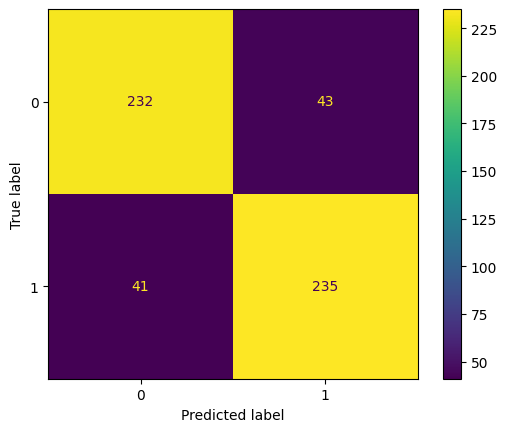

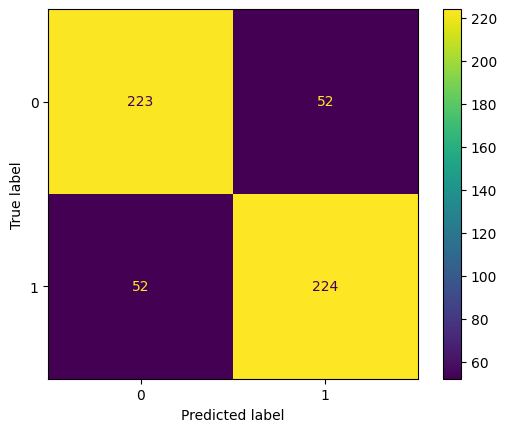

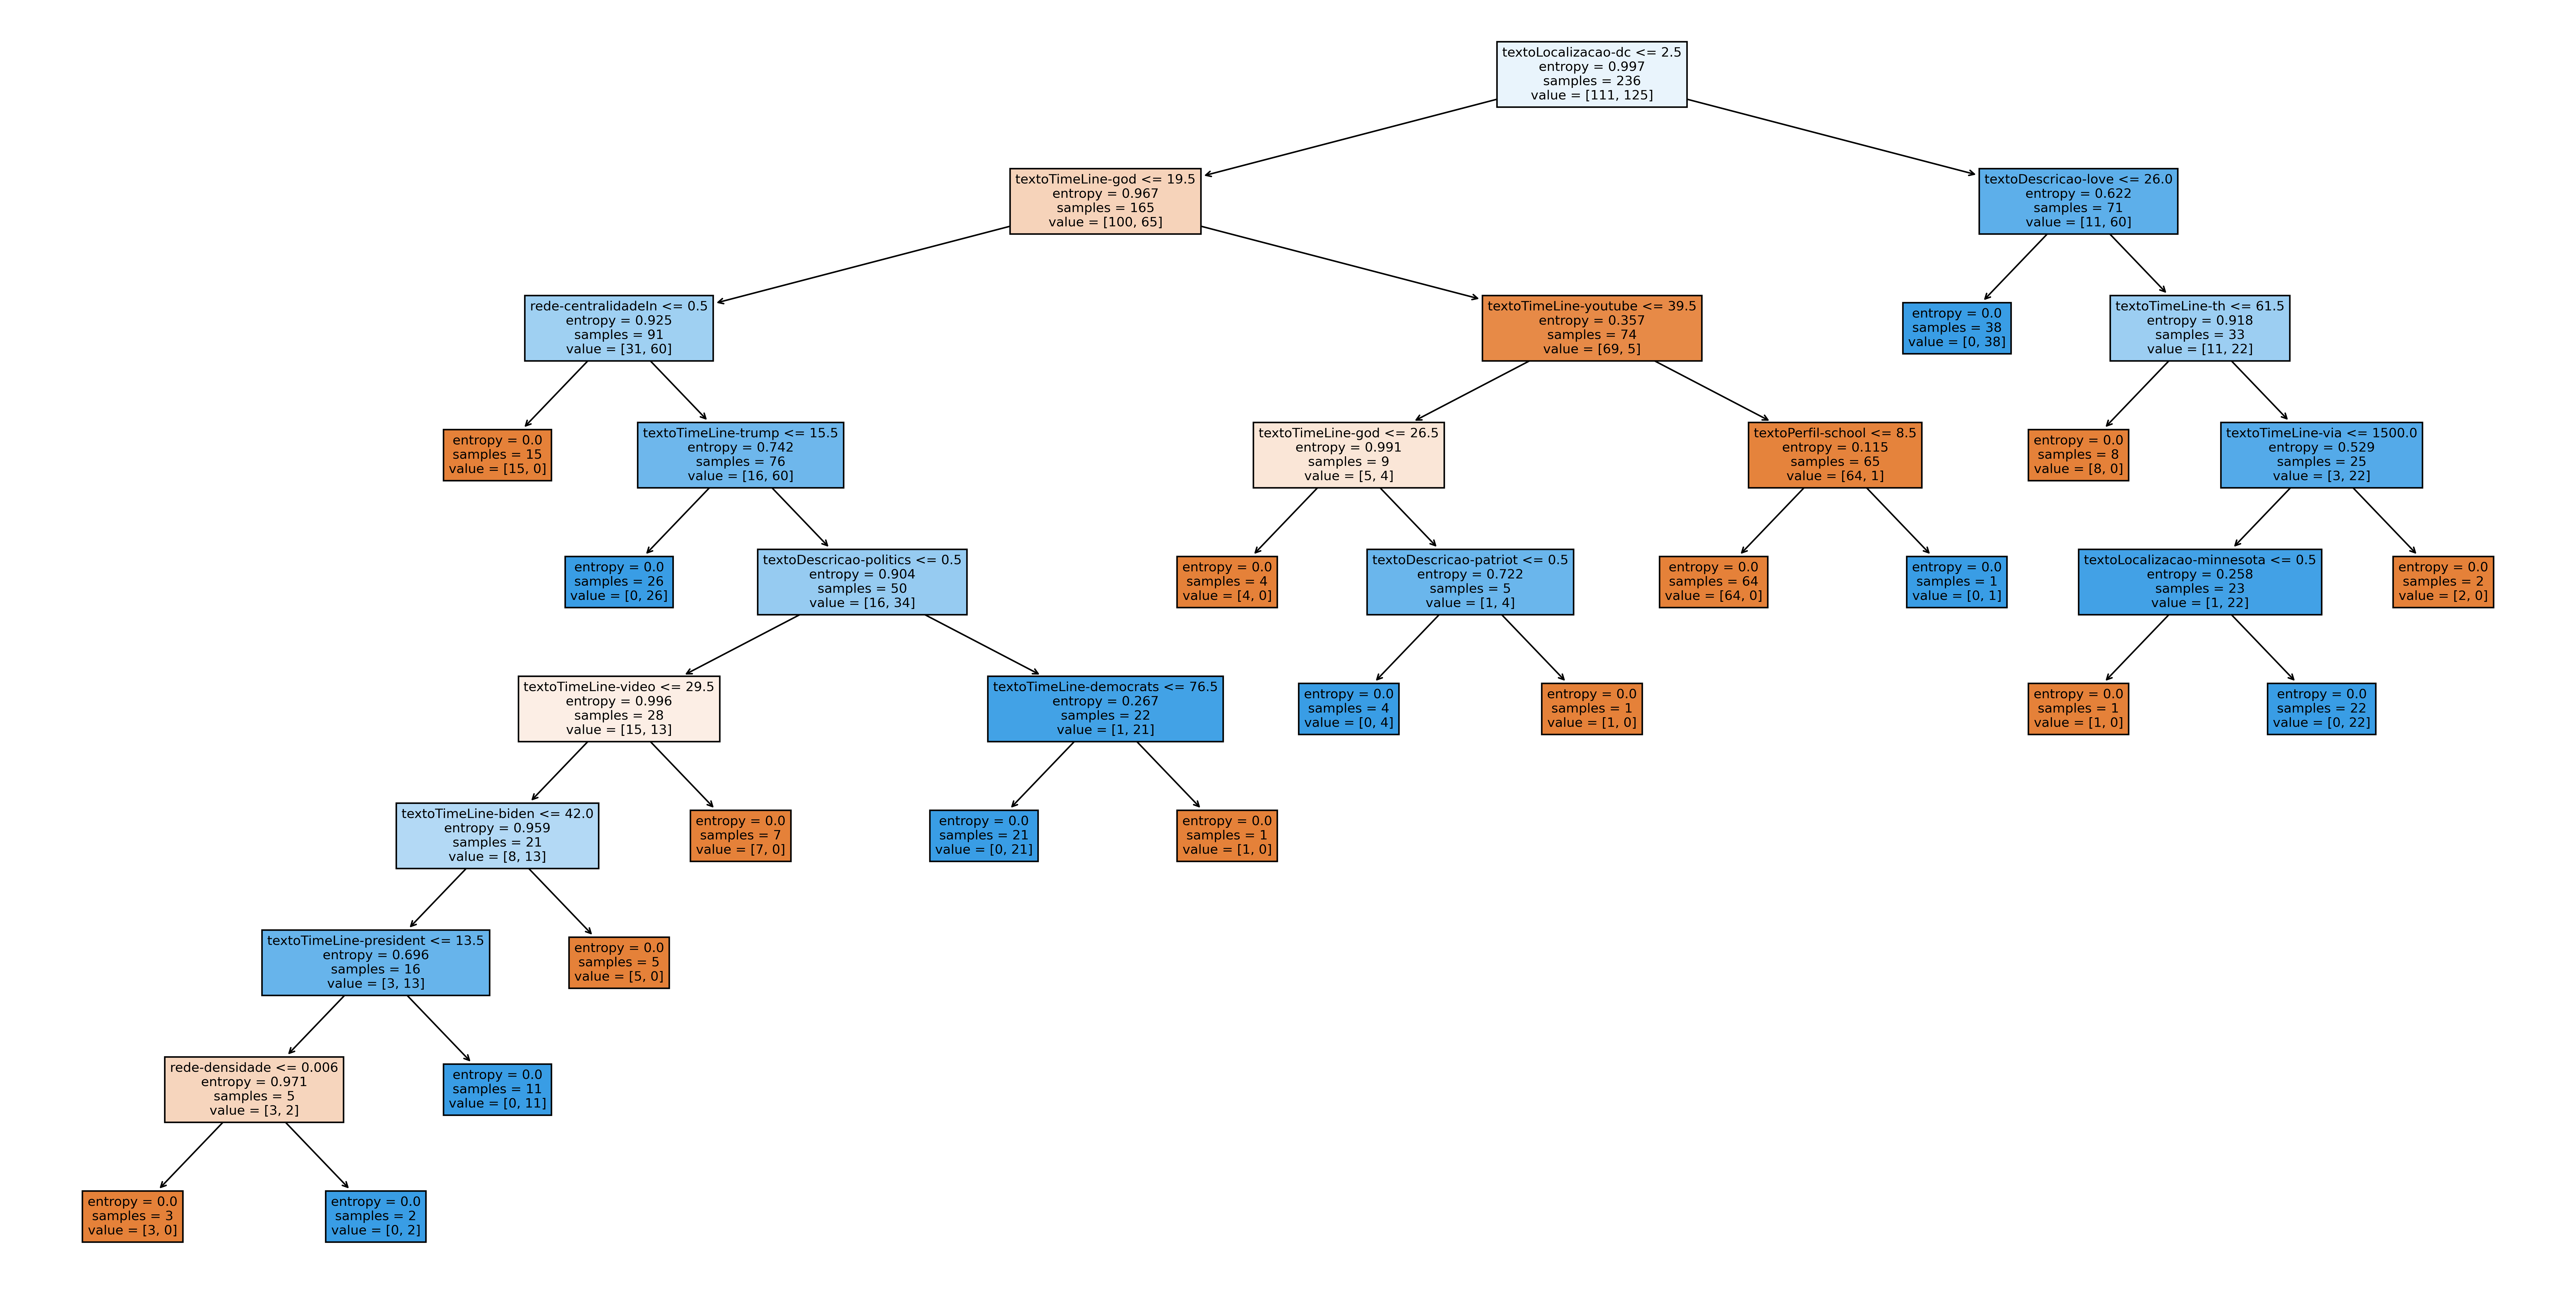

In [4]:
mediaPrecision = 0
melhorArvore = ""
melhorPrecisao = 0
piorPrecisao = math.inf
piorArvore = ""
for k in range(100):
    x_train,x_teste,y_train,y_teste = train_test_split(features, target, test_size=test_size, random_state=1)
    model = DecisionTreeClassifier(criterion = "entropy")
    model.fit(x_train,y_train)
    res = model.predict(x_teste)
    precision = f1_score(y_teste, res)
    if(melhorPrecisao < precision):
        melhorPrecisao =  precision
        melhorArvore = model
    if(piorPrecisao > precision):
        piorPrecisao =  precision
        piorArvore = model
    mediaPrecision += precision

print('Média f1_score: %f' % (mediaPrecision/100))




res = melhorArvore.predict(x_teste)
precision = f1_score(y_teste, res)
print('Melhor f1_score: %f' % (precision))

cm = confusion_matrix(y_teste, res, labels=melhorArvore.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=melhorArvore.classes_)
disp.plot()


res = piorArvore.predict(x_teste)
precision = f1_score(y_teste, res)
print('Pior f1_score: %f' % (precision))

cm = confusion_matrix(y_teste, res, labels=piorArvore.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=piorArvore.classes_)
disp.plot()


fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (30,15), dpi=400)
_ = tree.plot_tree(melhorArvore, 
                   feature_names=list(x_teste.columns),  
                   filled=True)



Média f1_score: 0.907255
Melhor f1_score: 0.920690
Pior f1_score: 0.891566


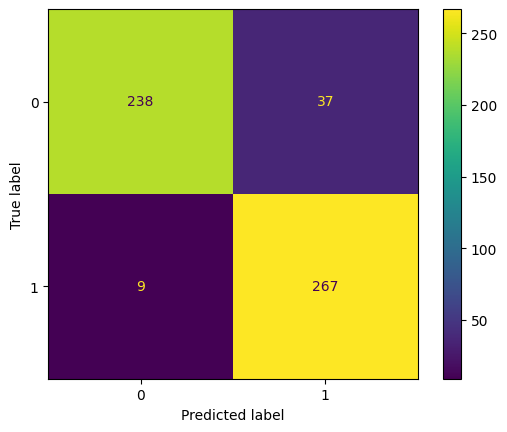

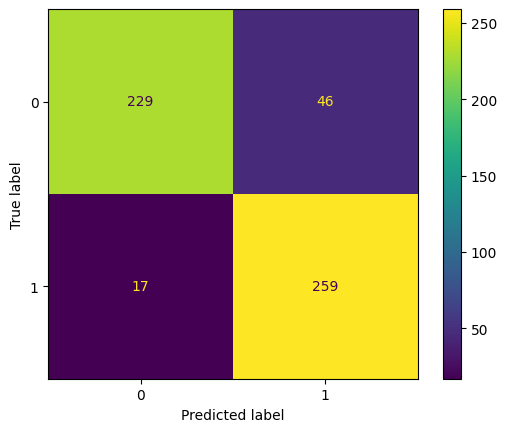

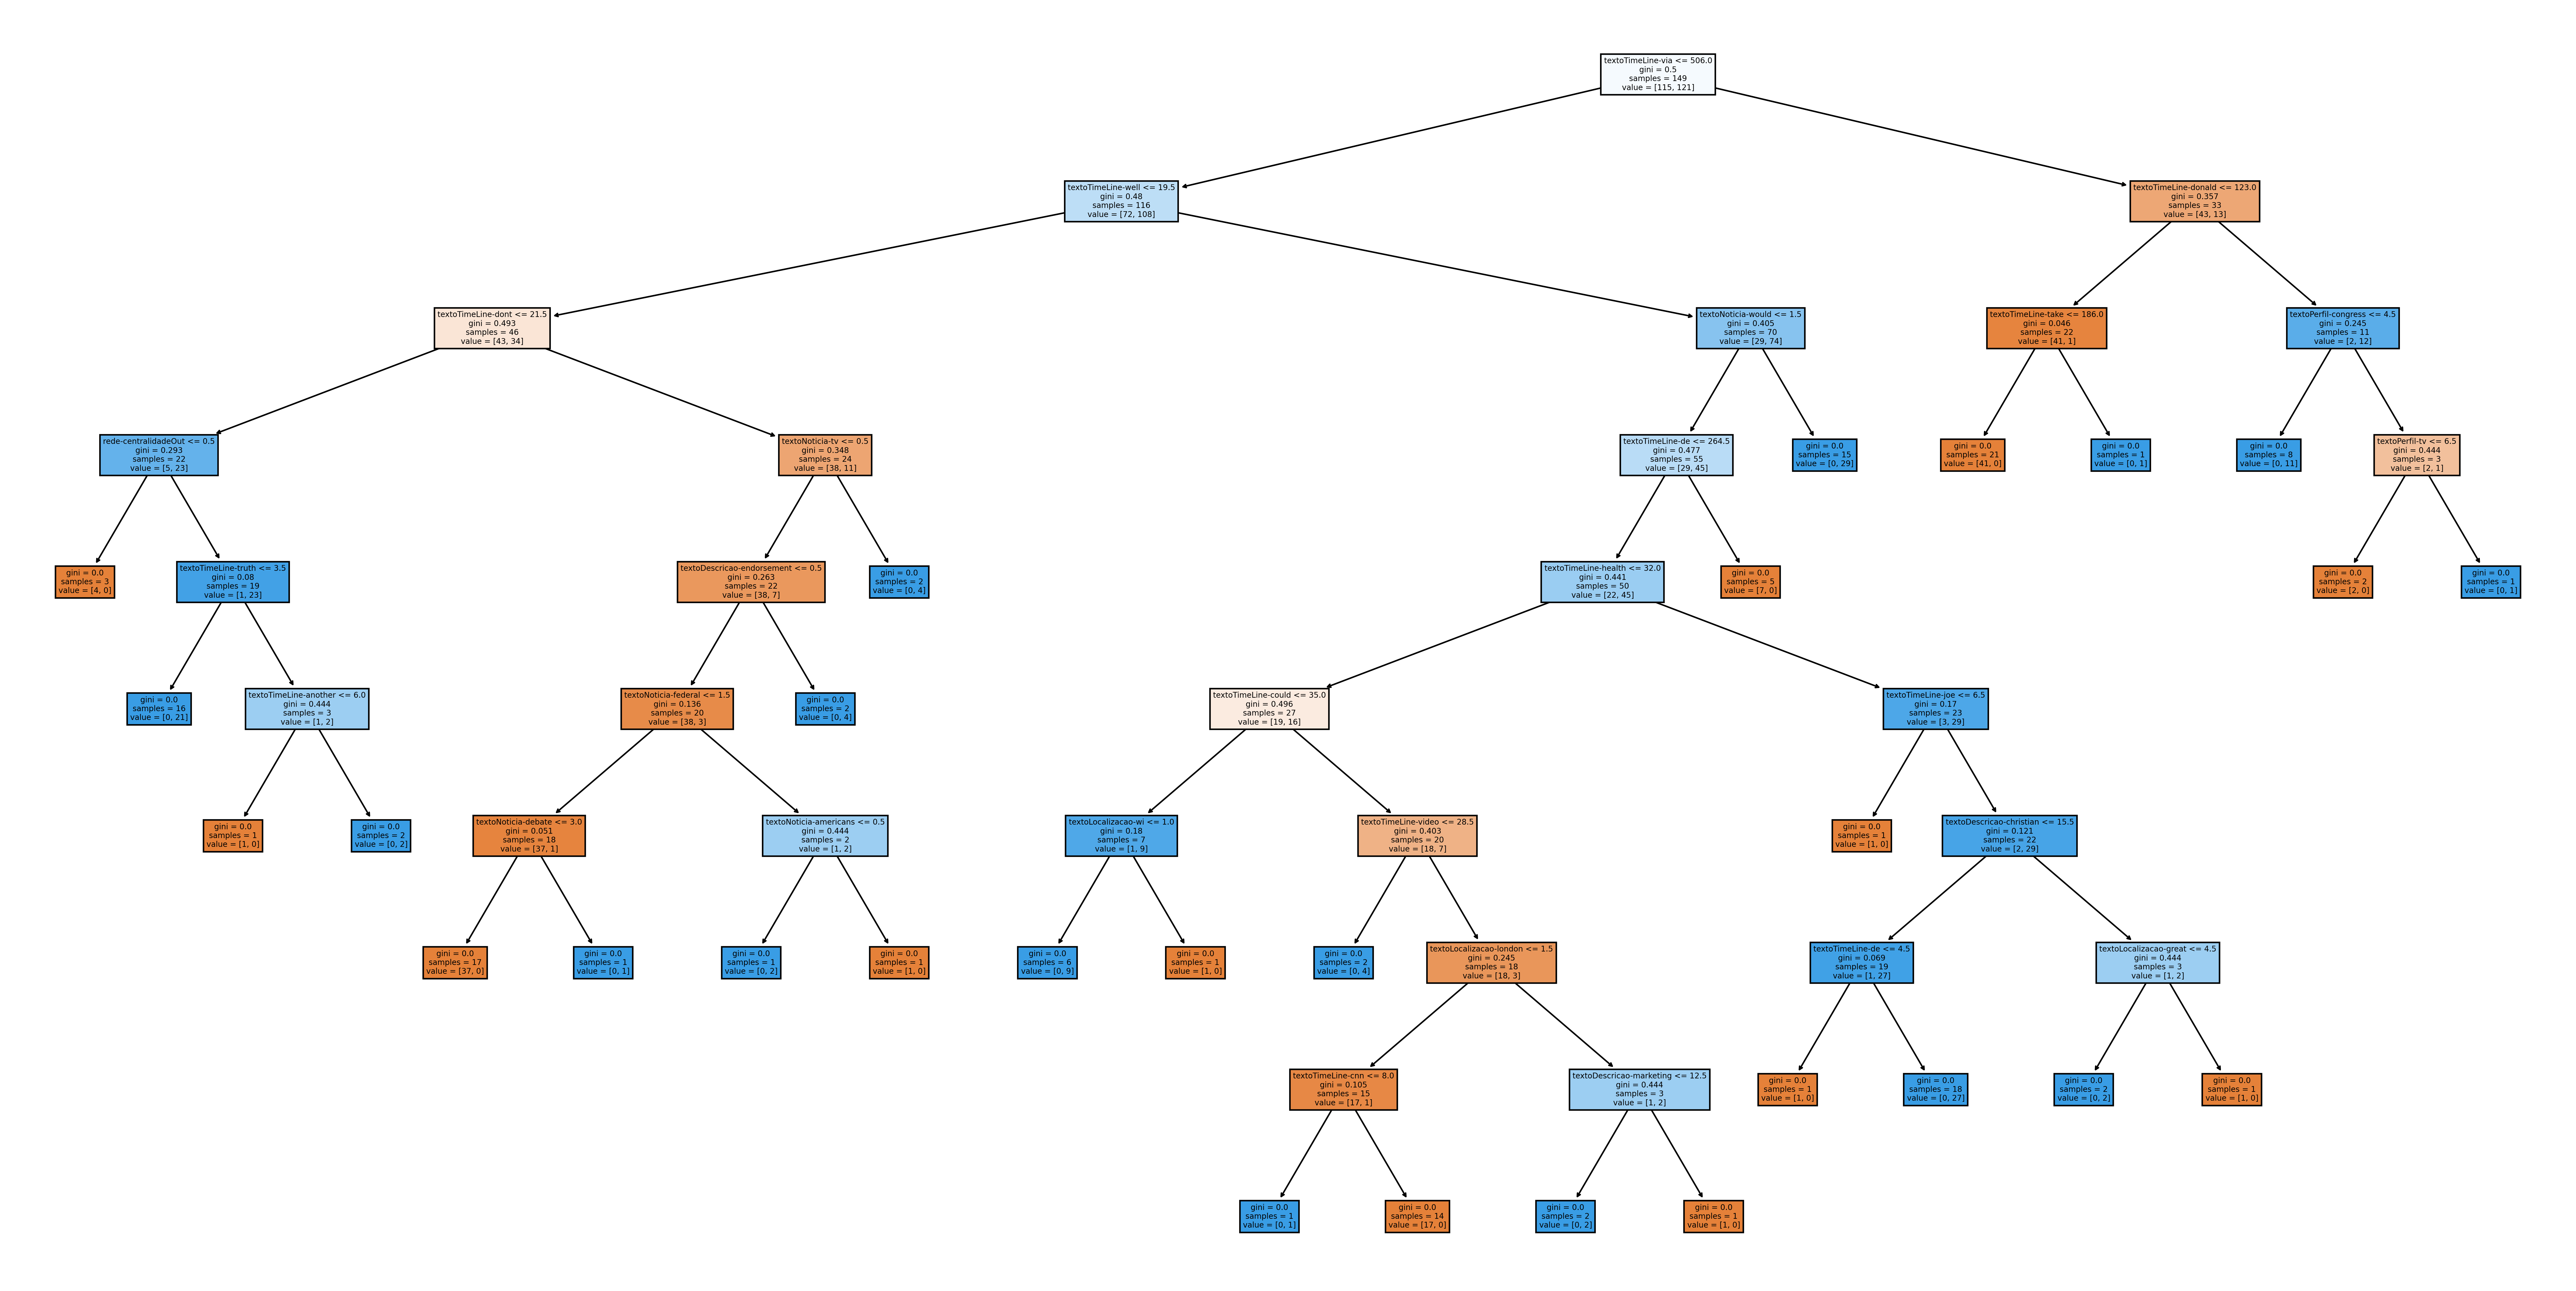

In [5]:
mediaPrecision = 0
melhorArvore = ""
melhorPrecisao = 0
piorPrecisao = math.inf
piorArvore = ""
for k in range(100):
    x_train,x_teste,y_train,y_teste = train_test_split(features, target, test_size=test_size, random_state=1)
    model = RandomForestClassifier()
    model.fit(x_train,y_train)
    res = model.predict(x_teste)
    precision = f1_score(y_teste, res)
    if(melhorPrecisao < precision):
        melhorPrecisao =  precision
        melhorArvore = model
    if(piorPrecisao > precision):
        piorPrecisao =  precision
        piorArvore = model
    mediaPrecision += precision


print('Média f1_score: %f' % (mediaPrecision/100))

res = melhorArvore.predict(x_teste)
precision = f1_score(y_teste, res)
print('Melhor f1_score: %f' % (precision))

cm = confusion_matrix(y_teste, res, labels=melhorArvore.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=piorArvore.classes_)
disp.plot()

res = piorArvore.predict(x_teste)
precision = f1_score(y_teste, res)
print('Pior f1_score: %f' % (precision))

cm = confusion_matrix(y_teste, res, labels=piorArvore.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=piorArvore.classes_)
disp.plot()

fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (30,15), dpi=400)
_ = tree.plot_tree(melhorArvore.estimators_[0], 
               feature_names=list(x_teste.columns),  
               filled=True,
               ax=axes)

18/18 [==============================] - 0s 1ms/step - loss: 0.7390 - f1_score_: 0.8277
Média f1_score: 83.653175
Melhor f1_score: 87.374002
Pior f1_score: 78.497148
18/18 [==============================] - 0s 999us/step


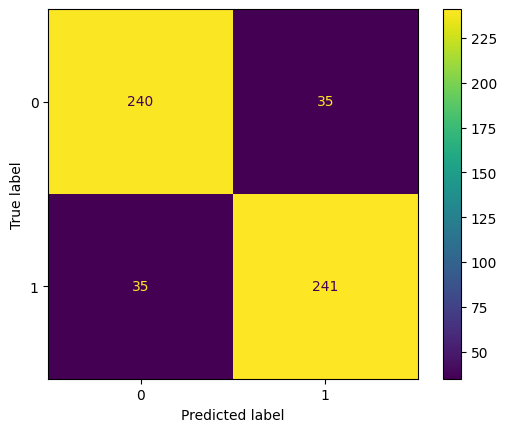

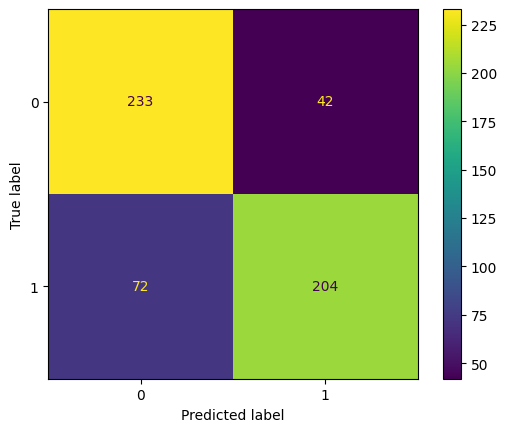

In [6]:
def f1_score_(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    recall = true_positives / (possible_positives + K.epsilon())
    f1 = 2 * (precision * recall) / (precision + recall + K.epsilon())
    return f1
    

std_scaler = StandardScaler()
df_scaled = std_scaler.fit_transform(features.to_numpy())
mediaPrecision = 0
melhorArvore = ""
melhorPrecisao = 0
piorPrecisao = math.inf
piorArvore = ""
x_train,x_teste,y_train,y_teste = train_test_split(df_scaled, target, test_size=0.7, random_state=1)

for k in range(100):
    model = Sequential()
    model.add(Dense(120, activation='relu', input_shape=(len(list(features.columns)),)))
    model.add(Dropout(0.2))
    model.add(Dense(120, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy',
    optimizer='adam',
    metrics=[f1_score_])
    model.fit(x_train.tolist(), y_train.tolist(), epochs=100, verbose=None)
    _, accuracy = model.evaluate(x_teste.tolist(), y_teste.tolist())
    accuracy = accuracy*100
    if(melhorPrecisao < accuracy):
        melhorPrecisao =  accuracy
        melhorArvore = model
    if(piorPrecisao > accuracy):
        piorPrecisao =  accuracy
        piorArvore = model
    mediaPrecision += accuracy
   
    
print('Média f1_score: %f' % (mediaPrecision/100))
print('Melhor f1_score: %f' % (melhorPrecisao))
print('Pior f1_score: %f' % (piorPrecisao))

res = melhorArvore.predict(x_teste.tolist())
cm = confusion_matrix(y_teste.tolist(), [1 if(k[0] >= 0.5) else 0 for k in res.tolist()])
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

res = piorArvore.predict(x_teste.tolist())
cm = confusion_matrix(y_teste.tolist(), [1 if(k[0] >= 0.5) else 0 for k in res.tolist()])
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()